# Project Timeline
    - Monday: Data acquisition 
    - Tuesday: Pineline, EDA and Visualization
    - Wednesday: Hypotheses testing and get things organized
    - Thursday: Preparation for presentation
    - Friday: Update latest data and make minor revise

-----------------


# Monday: Data acquisition
    - [x] Getting CSSE data on github
    - [x] Gather state testing data thru API
    - [x]  Webscrap korean testing data
    - [x]  Webscrap LA community level data
    - []  consolidate as database backup into psql

## **Data Source:**

- **Getting CSSE data on github**

    source: https://github.com/CSSEGISandData/COVID-19 by Johns Hopkins CSSE


- **Gather state testing data thru API**

    source: https://covidtracking.com/data 
    - US Testing in Time Series https://covidtracking.com/api/us/daily.csv
    - States Historical Data https://covidtracking.com/api/states/daily.csv


- **Webscrap korean testing data**

    Source: CDC of South Korean
    - sample data https://www.cdc.go.kr/board/board.es?mid=&bid=0030&act=view&list_no=366735
    
    
- **Webscrap LA community level data**

    Source: The Department of Public Health of Los Angeles County
    - sample data http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2298

## **Web scraping**
**preparation**

Firstly, create a webscrap class including functions for getting tables, get text and get urls. Such class definition is stored as ./src/web_scraping

In [462]:
from src.web_scaping import webscrap
import pandas as pd
import csv
import datetime

**Gather data with webscape class**

Many experts treated South Korea as a best practice in controlling COVID-19 and an good model to follow. Hence, in this study we will compare COVID-19 data between US and South Korea.

Unfortunately, there isn't an existing data source for South Korea testing data for the coronavirus. We utilized web scaping technique to collect data from press release of each day.


In [ ]:
# Gather all urls for all korean press releases

url_p1 = "https://www.cdc.go.kr/board.es?mid=&bid=0030&nPage="
url_p2 = (str(i) for i in list(range(1,25)))

url_lst = []

for page in url_p2:
    nws = webscrap(url_p1 + page)
    nws.start(random_headers = True)
    url_lst.append(nws.get_urls())

with open("url_k_t.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(url_lst2)
    

In [ ]:
# Gather Table from each page

url_p1 = "https://www.cdc.go.kr"
out_lst = []

for page in urls2:
    nws = webscrap(url_p1 + page)
    nws.start(random_headers = True)
    out_lst.append(nws.get_table())

with open("South_Korea_History data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(out_lst)
    

Not only the big picture in a country scale that we care, we also wants to provide a LA picture community level data. Similarly, we webscaped community level data from press release from Department of Public Health of Los Angeles County.

In [463]:
# collect LA data

url = "http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid="
url_lst = []
for i in list(range(2304,2267,-1)):
    url_lst.append(url + str(i))
out = []
for url in url_lst:
    nws = webscrap(url)
    nws.start(random_headers = True)
    temp_lst = []
    text = nws.get_text(elements = ["ul", "li"])
    if text:
        temp_lst.append(url[-4:])
        temp_lst.append(nws.get_table(index=1)[0][0])
        temp_lst.append(text)
        out.append(temp_lst)

# Save as csv

with open("LA_backup.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(out)


Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1
Connect successfully1


## Data Cleaning

Create a data pipeline to structure data
### LA data

In [774]:
def lacounty_daily_text_2_table(text_list):
    # pipeline function for date from mar 30
    out_lst = []
    temp = list(filter(lambda x: "City" in x, text_list))
    if temp:
        string = temp[0]
        str_lst2 = string.split("\t  ")
        string2 = str_lst2[0][:str_lst2[0].find("\t(\t")]

        for i in str_lst2:
            string2 = i[:i.find("\t(\t")]
            tem_lst = string2.replace("\t",",").strip().split(",")
            out_lst.append(tem_lst[0:2])
    return out_lst

In [775]:
def lacounty_daily_text_2_table2(text_list):
    # pipeline function for date of mar 22 - mar 29
    out_lst = []
    temp = list(filter(lambda x: "City" in x, text_list))
    if temp:
        string = temp[0]
        str_lst2 = string.split("\t")
        for i in range(len(str_lst2) - 1):
            temp_lst = []
            temp_lst.append (str_lst2[i].split("  ", 1)[1])
            temp_lst.append (str_lst2[i + 1].split("  ", 1)[0])
            out_lst.append(temp_lst)
    return out_lst

In [776]:
def find_LB_or_PD(raw_data, city):
    out_list = []
    for item in out:
        temp_lst = [item[1].split("\r\n\t")[1]]
        if len(item[2]) > 0:
            out_lst = []
            text_list = item[2]
            temp = list(filter(lambda x: city in x, text_list))
            if temp:
                temp_lst.append(temp[0].replace("-","").split(city)[1].split()[0])    
        if len(temp_lst) == 2:
        
            out_list.append(temp_lst)
        
        if len(out_list)>1 and out_list[-1][0] == out_list[-2][0]:
            out_list.pop(-1)
    return out_list

In [777]:
LB = find_LB_or_PD(out, "Long Beach")[:-6]
PD = find_LB_or_PD(out, "Pasadena")[:-6]
NLB = LB[:-5]
NLB.extend([["city2","Long Beach"]])
NLB.extend(LB[-5:])
NPD = PD[:-5]
NPD.extend([["city2","Pasadena"]])
NPD.extend(PD[-5:])

In [778]:
# data pipeline dfafter Mar 30
out2 = []
for item in out:
    temp_lst = [item[1].split("\r\n\t")[1]]
    if len(item[2]) > 0:
        temp_lst.append(lacounty_daily_text_2_table(item[2]))
    out2.append(temp_lst)

In [779]:
# data pipeline before mar 29
out3 = []
for item in out[15:]:
    temp_lst = [item[1].split("\r\n\t")[1]]
    if len(item[2]) > 0:
        temp_lst.append(lacounty_daily_text_2_table2(item[2]))
    out3.append(temp_lst)

IndexError: list index out of range

In [780]:
LA_data = {}
for i in out2[:15]:
    if len(i[1]):
        LA_data[i[0]] = i[1]
for i in out3:
    if len(i[1]):
        LA_data[i[0]] = i[1]

In [781]:
# merge into a readable format
import pandas as pd

df = pd.DataFrame(LA_data['April 08, 2020'], columns= ["city", 'April 08, 2020'] )
df.set_index(["city"])

for key in LA_data.keys():
    df2 = pd.DataFrame(LA_data[key], columns= ["city", key])
    df2.set_index(["city"])
    df = pd.merge(df, df2, how='left', left_on="city", right_on="city")



After checking the merged dataset, some data was not properly merge since the city name format has been change since March 26, 2020. We need do minor fix on the dataset.

In [782]:
df.drop(["April 08, 2020_y", "March 26, 2020", "March 25, 2020", "March 24, 2020", "March 23, 2020", "March 22, 2020"], axis=1, inplace=True)
df.rename({"April 08, 2020_x":"April 08, 2020"}, axis=1, inplace=True )

In [783]:
# helper function to fix city names
def aka_name(city_name):
    new_name = ""
    if city_name[:7] == "City of":
        new_name += city_name[-(len(city_name) - 8) : ]
    elif city_name[:14] == 'Unincorporated':
        new_name += city_name[-(len(city_name) - 17) : ]
    elif city_name[:14] == 'Los Angeles - ':
        new_name += city_name[-(len(city_name) - 14) : ]
    else:
        new_name += city_name
    return new_name

df["city2"] = df["city"].apply(lambda x: aka_name(x))

In [784]:
# fix data for the first 5 day data
key_list = list(LA_data.keys())[-5 : ]
for key in key_list:
    df2 = pd.DataFrame(LA_data[key], columns= ["city2", key])
    df2["city2"] = df2["city2"].apply(lambda x : x.strip("*"))
    df2.set_index(["city2"])
    df = pd.merge(df, df2, how='left', left_on="city2", right_on="city2")
    
df.set_index("city", inplace=True)

In [785]:
df

April 08, 2020 April 07, 2020  \
city                                                              
City of Agoura Hills                          19             19   
City of Alhambra                              26             24   
City of Arcadia                               17             17   
City of Artesia                               --             --   
City of Avalon                                 0              0   
...                                          ...            ...   
Unincorporated - Whittier                     --             --   
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                  19             15   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       732            599   

                                  April 06, 2020 April 05, 2020  \
city                                                              
City of Agoura Hills                          18             18   
City of Alhambra                              22             21   
City of Arcadia                               16             14   
City of Artesia                               --             --   
City of Avalon                                 0              0   
...                                          ...            ...   
Unincorporated - Whittier                     --             --   
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                  14             12   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       599            614   

                                  April 04, 2020 April 03, 2020  \
city                                                              
City of Agoura Hills                          17             16   
City of Alhambra                              19             17   
City of Arcadia                               13             13   
City of Artesia                               --             --   
City of Avalon                                 0              0   
...                                          ...            ...   
Unincorporated - Whittier                      0              0   
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                  10              8   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       606            518   

                                  April 02, 2020 April 01, 2020  \
city                                                              
City of Agoura Hills                          14             10   
City of Alhambra                              15             13   
City of Arcadia                               12             12   
City of Artesia                               --             --   
City of Avalon                                 0              0   
...                                          ...            ...   
Unincorporated - Whittier                      0              0   
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                   6              5   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       505            394   

                                  March 31, 2020 March 30, 2020  \
city                                                              
City of Agoura Hills                          11              9   
City of Alhambra                              13             11   
City of Arcadia                               10              9   
City of Artesia                               --             --   
City of Avalon                                 0              0   
...                                          ...            ...   
Unincorpor

In [786]:
ndf = pd.DataFrame(NLB).set_index(0).transpose()
df.loc["Unincorporated - Long Beach",:] = ndf.values.tolist()[0]
ndf2 = pd.DataFrame(NPD).set_index(0).transpose()
df.loc["City of Pasadena",:] = ndf2.values.tolist()[0]
df.tail()

April 08, 2020 April 07, 2020  \
city                                                              
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                  19             15   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       732            599   
City of Pasadena                              80             72   

                                  April 06, 2020 April 05, 2020  \
city                                                              
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                  14             12   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       599            614   
City of Pasadena                              58             58   

                                  April 04, 2020 April 03, 2020  \
city                                                              
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                  10              8   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       606            518   
City of Pasadena                              37             37   

                                  April 02, 2020 April 01, 2020  \
city                                                              
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                   6              5   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       505            394   
City of Pasadena                              37             33   

                                  March 31, 2020 March 30, 2020  \
city                                                              
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                   2              2   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       309            222   
City of Pasadena                              25             10   

                                  March 29, 2020 March 28, 2020  \
city                                                              
Unincorporated - Whittier Narrows              0              0   
Unincorporated - Willowbrook                   1              1   
Unincorporated - Wiseburn                     --             --   
-  Under Investigation                       184            154   
City of Pasadena                              10              9   

                                  March 27, 2020                   city2  \
city                                                                       
Unincorporated - Whittier Narrows            NaN        Whittier Narrows   
Unincorporated - Willowbrook                   1             Willowbrook   
Unincorporated - Wiseburn                     --                Wiseburn   
-  Under Investigation                       143  -  Under Investigation   
City of Pasadena                               9                Pasadena   

                                  March 26, 2020 March 25, 2020  \
city                                                              
Unincorporated - Whittier Narrows            NaN            NaN   
Unincorporated - Willowbrook                   1              1   
Unincorporated - Wiseburn                    NaN            NaN   
-  Under Investigation                       141             56   
City of Pasadena                               9              7   

                                  March 24, 2020 March 23, 2020 March 22, 2020  
city                                                                            
Unincorporated - Whittier Narrows            NaN 

In [787]:
# making a csv backup
df.to_csv("la_community_0408.csv", index=True)

### korea data

In [380]:
with open("./Data/Testing/South_Korea_History data.csv", "r", newline="") as f:
    reader = csv.reader(f)
    k_data = list(reader)

In [394]:
tmp_lst = []
for i in k_data:
    if len(i)>3:
        tmp_lst.append(i[3])
# tmp_lst = list(i[3] if len(i)>3 for i in k_data)
tmp_lst2 = []
for item in tmp_lst:
    tmp_lst3 = item.replace(', ', '').replace("'", '').replace("]", '').split("\\n")[1:]
    if tmp_lst3[0] not in ["discharged", "Busan"]:
        tmp_lst2.append(tmp_lst3)

for i in range(len(tmp_lst2)):
    for j in range(len(tmp_lst2[i])):
        tmp_lst2[i][j] = (tmp_lst2[i][j].replace("As of 0:00", '').replace("As of 9:00", '')
                          .replace("As of 16:00", '').replace("As of 09:00", '')
                          .replace("As of 00:00", '').replace("As of 11:30", '')
                          .replace("As of 16:30", '').replace("As of 11:00", '')
                         .replace(".","").replace(",","").replace("\\xa0","")
                          .replace("March","Mar").replace("April","Apr")
                          .strip().strip("*"))
                          
    if len(tmp_lst2[i][0].strip()) == 0:
        tmp_lst2[i] = tmp_lst2[i][1:]
    if len(tmp_lst2[i][2].strip()) == 0:
        tmp_lst2[i].remove("")
    if  " (" in tmp_lst2[i][0]:
        tmp_lst2[i][0] = tmp_lst2[i][0][: tmp_lst2[i][0].find(" (")]

## keep only one daily data
tmp_lst4 = [tmp_lst2[0]]
for i in range(2, len(tmp_lst2)):
    if tmp_lst2[i][0] != tmp_lst2[i-1][0] and tmp_lst2[i][0] != tmp_lst2[i-2][0]:
        tmp_lst4.append(tmp_lst2[i])

df = pd.DataFrame(tmp_lst4)
df.to_csv("k_data_0406_raw.csv")        

# Tuesday: Pineline, EDA and Visualization
    -[x] Data cleaning and get ready for Pandas
    -[x] Data screening and mark outlier
    -[x] EDA on testing data on Korean
    -[?] EDA on case data US
    -[?] Visualization on community level

In [91]:
# df = pd.read_csv("./Data/Testing/k_data_0406_raw.csv")

In [416]:
df = pd.DataFrame(tmp_lst4)

In [417]:
### fix mismatch record
df = df.set_index(0)
df2 = df.loc["13 Mar":"20 Feb", 7:8]
df2.rename(columns={7: 6, 8: 7}, inplace=True)
df.loc["13 Mar":"20 Feb", 6:7] = df2
mismatch_date_lst = ["19 Feb", "18 Feb", "16 Feb", "14 Feb", "12 Feb", "10 Feb", "8 Feb"]
for date in mismatch_date_lst:
    value_lst = df.loc[date, 2:6].tolist()
    value_lst.insert(0, int(value_lst[0]) + int(value_lst[1]))
    df.loc[date, 2:7] = value_lst
    
# impute missing Feb 15th Data with real data
df.loc["15 Feb"] = [7734, 28, 19, 9 , 0, 558, 7148,0]

df.loc["19 Feb":"8 Feb", 5] = 0
df.drop(8, axis=1, inplace=True)

# convert to readable column name
n_columns=["Total","PCR_Confirmed","PCR_Discharged","PCR_Isolated","PCR_Deceased","Being_tested","Tested_negative"]
col_dict = dict((i , n_columns[int(i)-1]) for i in df.columns)
df.rename(col_dict, axis=1, inplace=True)
df.to_csv("korea_data.csv")

## **Let's go EDA**
### Testing data - Korea Data

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats
import folium
import altair as alt

In [461]:
korea_data = pd.read_csv("./Data/Testing/korea_data.csv")
korea_data.rename({"0":"Date"}, axis=1, inplace=True)
korea_data['Date']= pd.to_datetime("2020 " + korea_data['Date']) 
korea_data.sort_values(by=['Date'], inplace=True, ascending=False)
korea_data.set_index("Date", inplace=True)

korea_data.tail(15)

Total  PCR_Confirmed  PCR_Discharged  PCR_Isolated  PCR_Deceased  \
Date                                                                           
2020-02-22  21586            433              18           413             2   
2020-02-21  16400            204              17           186             1   
2020-02-20  13202            104              87            16             1   
2020-02-19  11173             51              35            16             0   
2020-02-18   9265             31              21            10             0   
2020-02-17   8171             30              21             9             0   
2020-02-16   7919             29              20             9             0   
2020-02-15   7734             28              19             9             0   
2020-02-14   6854             28              21             7             0   
2020-02-13   5797             28              21             7             0   
2020-02-12   5074             28              24             4             0   
2020-02-11   4325             28              24             4             0   
2020-02-10   2776             27              24             3             0   
2020-02-09   2598             27              24             3             0   
2020-02-08   1701             24              22             2             0   

            Being_tested  Tested_negative  
Date                                       
2020-02-22          6037            15116  
2020-02-21          3180            13016  
2020-02-20          1860            11238  
2020-02-19          1149             9973  
2020-02-18           957             8277  
2020-02-17           408             7733  
2020-02-16           577             7313  
2020-02-15           558             7148  
2020-02-14           692             6134  
2020-02-13           670             5099  
2020-02-12           992             4054  
2020-02-11           762             3535  
2020-02-10           809             1940  
2020-02-09           888             1683  
2020-02-08           620             1057

In [462]:
korea_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2020-04-06 to 2020-02-08
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total            59 non-null     int64
 1   PCR_Confirmed    59 non-null     int64
 2   PCR_Discharged   59 non-null     int64
 3   PCR_Isolated     59 non-null     int64
 4   PCR_Deceased     59 non-null     int64
 5   Being_tested     59 non-null     int64
 6   Tested_negative  59 non-null     int64
dtypes: int64(7)
memory usage: 3.7 KB


In [463]:
korea_data.describe()

Total  PCR_Confirmed  PCR_Discharged  PCR_Isolated  \
count      59.000000      59.000000       59.000000     59.000000   
mean   195056.355932    5348.661017     1599.542373   3685.966102   
std    159186.006920    4003.130657     2220.757997   2728.970508   
min      1701.000000      24.000000       17.000000      2.000000   
25%     23882.500000     517.500000       24.000000    496.000000   
50%    188518.000000    7134.000000      130.000000   4159.000000   
75%    334908.000000    8929.000000     3037.500000   6109.500000   
max    466804.000000   10284.000000     6598.000000   7470.000000   

       PCR_Deceased  Being_tested  Tested_negative  
count     59.000000     59.000000        59.000000  
mean      63.152542  14618.288136    175089.406780  
std       61.819206   9513.058589    151820.730467  
min        0.000000    408.000000      1057.000000  
25%        3.500000   7047.000000     16318.000000  
50%       50.000000  15904.000000    162008.000000  
75%      107.500000  19101.500000    311895.000000  
max      186.000000  35555.000000    437225.000000

Since columns in table are in different time scale, the [Being_tested] is on a short term scale while others are in accumulated scale. Hence, we transform data into daily scale.

In [464]:
korea_data["new_positive"] = korea_data["PCR_Confirmed"] - korea_data["PCR_Confirmed"].shift(-1)
korea_data["new_negative"] = korea_data["Tested_negative"] - korea_data["Tested_negative"].shift(-1)
korea_data["new_testing"] = korea_data["new_positive"] + korea_data["new_negative"]
korea_data["positive_rate"] = korea_data["new_positive"] / korea_data["new_testing"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd022cd588>,
      dtype=object)

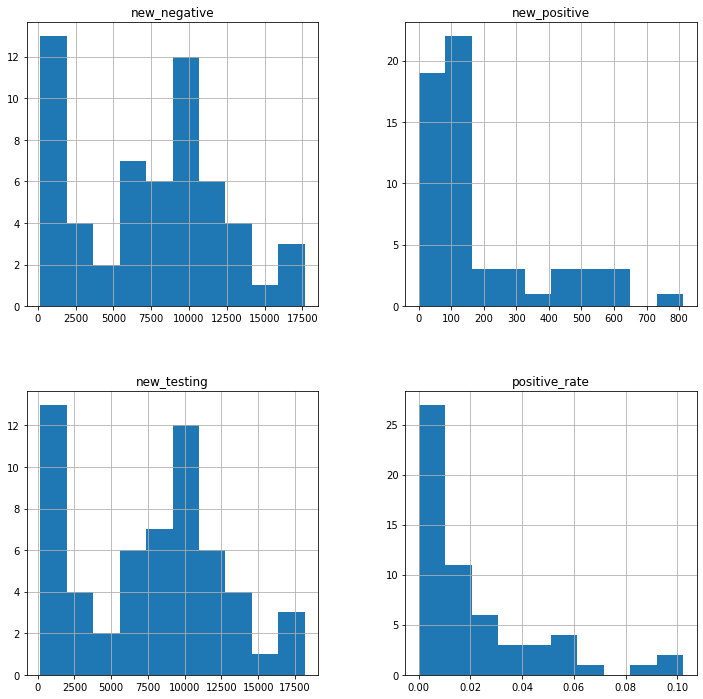

In [465]:
k_daily = korea_data.loc[:,"new_positive":]

k_daily.hist(figsize = (12,12))

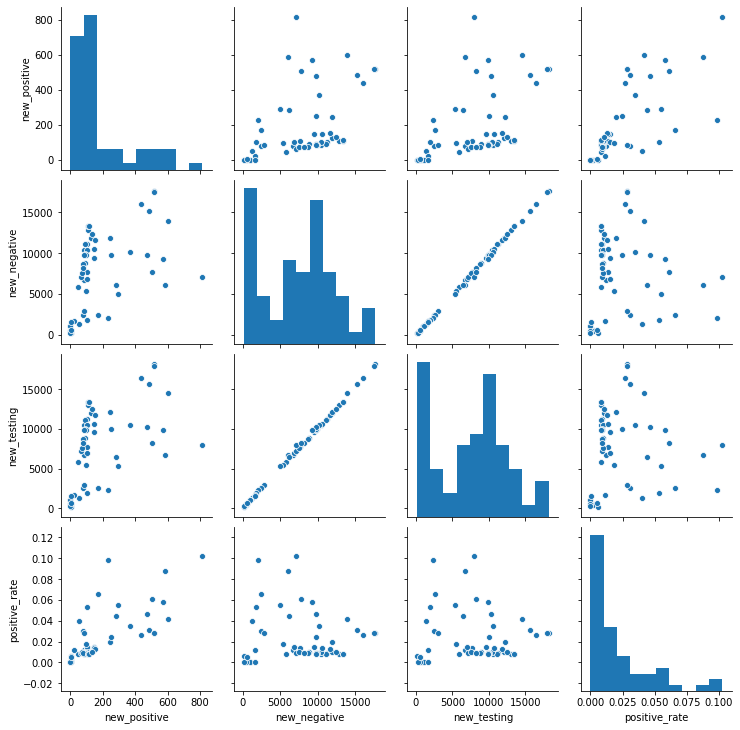

In [466]:
sns.pairplot(k_daily)

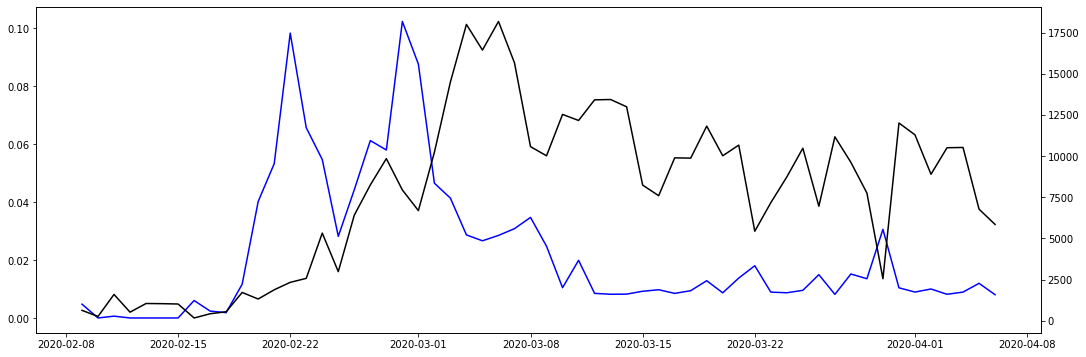

In [467]:
fig, ax = plt.subplots(figsize= (18,6))

# plt.xticks(k_daily['new_positive'], k_daily.index.values ) # location, labels
ax.plot(k_daily['positive_rate'],color = "blue")
ax2 = ax.twinx()
ax2.plot(k_daily['new_testing'],color = "black" )


**Correlation test on daily testing and positive rate**

TBD

In [340]:
k_daily.corr()

new_positive  new_negative  new_testing  positive_rate
new_positive       1.000000      0.537889     0.565167       0.517948
new_negative       0.537889      1.000000     0.999465      -0.106502
new_testing        0.565167      0.999465     1.000000      -0.084133
positive_rate      0.517948     -0.106502    -0.084133       1.000000

In [475]:
corr_df = k_daily[["positive_rate","new_testing"]]
corr_df.dropna(inplace = True)

stats.pearsonr(corr_df["positive_rate"],corr_df["new_testing"])

/home/vince/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.03174401658820847, 0.8130042886430566)

In [470]:
k_daily.loc[:"2020-02-29",:].corr()

new_positive  new_negative  new_testing  positive_rate
new_positive       1.000000      0.356595     0.406490       0.867048
new_negative       0.356595      1.000000     0.998543      -0.100977
new_testing        0.406490      0.998543     1.000000      -0.048670
positive_rate      0.867048     -0.100977    -0.048670       1.000000

In [471]:
k_daily.loc["2020-02-28":,:].corr()

new_positive  new_negative  new_testing  positive_rate
new_positive       1.000000      0.962353     0.966865       0.744639
new_negative       0.962353      1.000000     0.999853       0.610381
new_testing        0.966865      0.999853     1.000000       0.620195
positive_rate      0.744639      0.610381     0.620195       1.000000

### **US Test Data EDA**

In [300]:
US_test_data = pd.read_csv("./Data/Testing/us-daily.csv")

In [301]:
US_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      33 non-null     int64  
 1   states                    33 non-null     int64  
 2   positive                  33 non-null     int64  
 3   negative                  33 non-null     int64  
 4   pending                   33 non-null     int64  
 5   hospitalizedCurrently     12 non-null     float64
 6   hospitalizedCumulative    16 non-null     float64
 7   inIcuCurrently            11 non-null     float64
 8   inIcuCumulative           12 non-null     float64
 9   onVentilatorCurrently     12 non-null     float64
 10  onVentilatorCumulative    12 non-null     float64
 11  recovered                 12 non-null     float64
 12  hash                      33 non-null     object 
 13  dateChecked               33 non-null     object 
 14  death       

date     states       positive      negative       pending  \
count  3.300000e+01  33.000000      33.000000  3.300000e+01     33.000000   
mean   2.020033e+07  51.787879   73166.848485  3.466931e+05  21219.454545   
std    3.204010e+01   9.399992  100485.594260  4.357450e+05  27225.813785   
min    2.020030e+07  14.000000     118.000000  7.480000e+02    103.000000   
25%    2.020031e+07  51.000000    1315.000000  8.041000e+03    673.000000   
50%    2.020032e+07  56.000000   17033.000000  1.181470e+05   3016.000000   
75%    2.020033e+07  56.000000  118234.000000  6.174700e+05  59518.000000   
max    2.020040e+07  56.000000  332308.000000  1.429724e+06  65709.000000   

       hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
count              12.000000                 16.0000       11.000000   
mean            13052.000000              19141.8125     3417.818182   
std              7034.033021              13829.2748     1407.807929   
min                96.000000               1964.0000     1299.000000   
25%              8426.750000               5719.0000     2315.000000   
50%             13191.500000              17882.0000     3402.000000   
75%             17849.250000              31518.7500     4475.000000   
max             23061.000000              41372.0000     5497.000000   

       inIcuCumulative  onVentilatorCurrently  ...        death  hospitalized  \
count        12.000000              12.000000  ...    33.000000       16.0000   
mean       1848.916667             166.166667  ...  1597.666667    19141.8125   
std        1366.597198             227.537343  ...  2604.477751    13829.2748   
min          74.000000               4.000000  ...    10.000000     1964.0000   
25%         666.500000              54.000000  ...    36.000000     5719.0000   
50%        1664.000000              68.000000  ...   219.000000    17882.0000   
75%        2775.750000             118.000000  ...  1965.000000    31518.7500   
max        4270.000000             656.000000  ...  9498.000000    41372.0000   

              total  totalTestResults        posNeg  deathIncrease  \
count  3.300000e+01      3.300000e+01  3.300000e+01      32.000000   
mean   4.410794e+05      4.198599e+05  4.198599e+05     296.500000   
std    5.551874e+05      5.359030e+05  5.359030e+05     422.458626   
min    9.690000e+02      8.660000e+02  8.660000e+02       1.000000   
25%    1.002900e+04      9.356000e+03  9.356000e+03       7.750000   
50%    1.385070e+05      1.351800e+05  1.351800e+05      56.000000   
75%    8.014130e+05      7.357040e+05  7.357040e+05     442.000000   
max    1.779339e+06      1.762032e+06  1.762032e+06    1352.000000   

       hospitalizedIncrease  negativeIncrease  positiveIncrease  \
count             32.000000         32.000000          32.00000   
mean            1292.875000      44655.500000       10380.93750   
std             1561.916931      46148.563788       11268.80512   
min                0.000000        205.000000          47.00000   
25%                0.000000       3182.500000         465.00000   
50%              295.000000      33274.000000        5739.00000   
75%             2915.250000      80157.500000       19322.50000   
max             4482.000000     193178.000000       33767.00000   

       totalTestResultsIncrease  
count                 32.000000  
mean               55036.437500  
std                56864.079425  
min                  263.000000  
25%                 3647.500000  
50%                39117.000000  
75%               101849.000000  
max               226945.000000  

[8 rows x 22 columns]

In [319]:
US_test_data["positive_rate"] = US_test_data["positiveIncrease"] / US_test_data["totalTestResultsIncrease"]
# 
US_test_data_short = US_test_data[["date","positive","negative","death", "positiveIncrease", "negativeIncrease", "deathIncrease","totalTestResultsIncrease", "positive_rate"]]
US_test_data_short.describe()

date       positive      negative        death  \
count  3.300000e+01      33.000000  3.300000e+01    33.000000   
mean   2.020033e+07   73166.848485  3.466931e+05  1597.666667   
std    3.204010e+01  100485.594260  4.357450e+05  2604.477751   
min    2.020030e+07     118.000000  7.480000e+02    10.000000   
25%    2.020031e+07    1315.000000  8.041000e+03    36.000000   
50%    2.020032e+07   17033.000000  1.181470e+05   219.000000   
75%    2.020033e+07  118234.000000  6.174700e+05  1965.000000   
max    2.020040e+07  332308.000000  1.429724e+06  9498.000000   

       positiveIncrease  negativeIncrease  deathIncrease  \
count          32.00000         32.000000      32.000000   
mean        10380.93750      44655.500000     296.500000   
std         11268.80512      46148.563788     422.458626   
min            47.00000        205.000000       1.000000   
25%           465.00000       3182.500000       7.750000   
50%          5739.00000      33274.000000      56.000000   
75%         19322.50000      80157.500000     442.000000   
max         33767.00000     193178.000000    1352.000000   

       totalTestResultsIncrease  positive_rate  
count                 32.000000      32.000000  
mean               55036.437500       0.169707  
std                56864.079425       0.063618  
min                  263.000000       0.058754  
25%                 3647.500000       0.128301  
50%                39117.000000       0.155401  
75%               101849.000000       0.198512  
max               226945.000000       0.331461

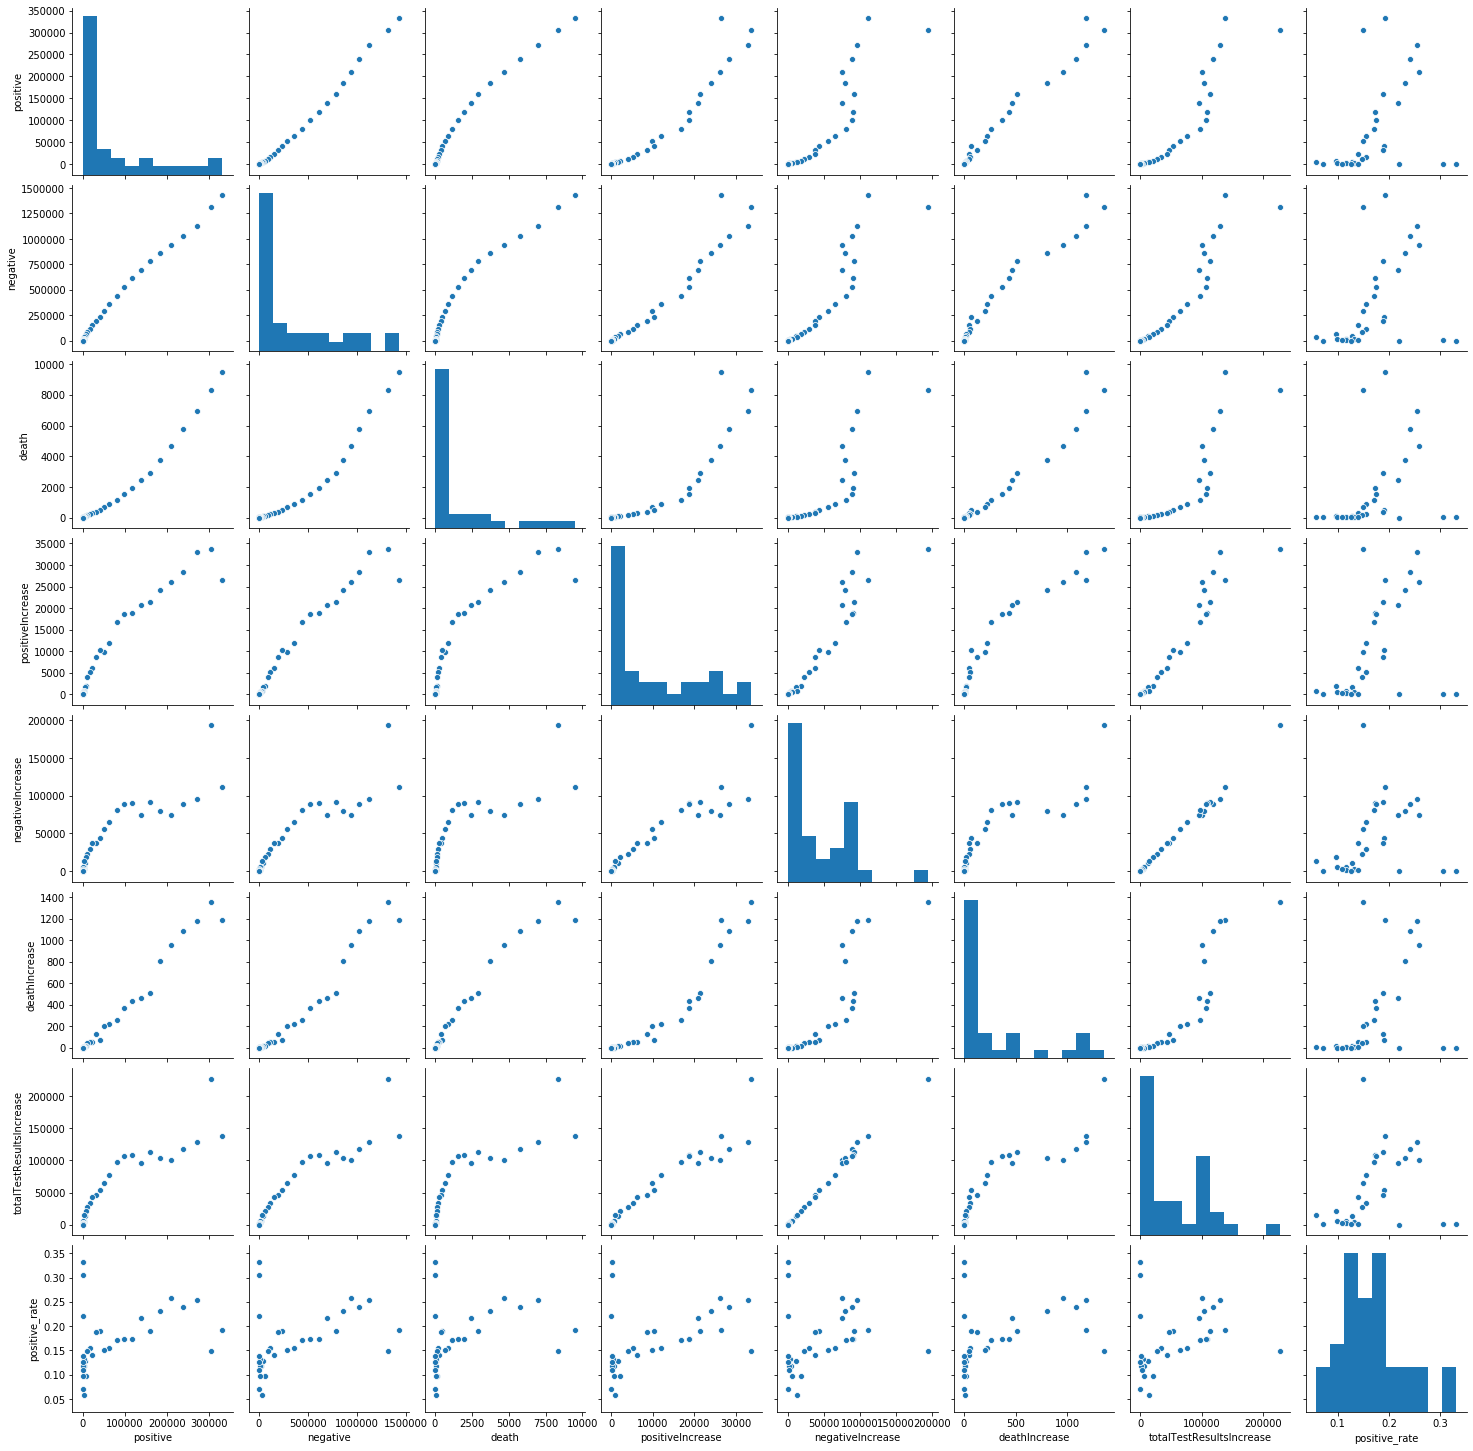

In [310]:
sns.pairplot(US_test_data_short)

### **State Test Data EDA**

In [320]:
State_test_data = pd.read_csv("./Data/Testing/states-daily.csv")

In [321]:
State_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1709 non-null   int64  
 1   state                     1709 non-null   object 
 2   positive                  1701 non-null   float64
 3   negative                  1563 non-null   float64
 4   pending                   475 non-null    float64
 5   hospitalizedCurrently     129 non-null    float64
 6   hospitalizedCumulative    495 non-null    float64
 7   inIcuCurrently            39 non-null     float64
 8   inIcuCumulative           79 non-null     float64
 9   onVentilatorCurrently     37 non-null     float64
 10  onVentilatorCumulative    47 non-null     float64
 11  recovered                 170 non-null    float64
 12  hash                      1709 non-null   object 
 13  dateChecked               1709 non-null   object 
 14  death   

In [322]:
State_test_data["positive_rate"] = State_test_data["positiveIncrease"] / State_test_data["totalTestResultsIncrease"]
# 
State_test_data_short = State_test_data[["date","state","positive","negative","death", "positiveIncrease", "negativeIncrease", "deathIncrease","totalTestResultsIncrease", "positive_rate"]]
State_test_data_short.describe()

date       positive       negative        death  \
count  1.709000e+03    1701.000000    1563.000000  1028.000000   
mean   2.020033e+07    1419.462669    7319.815739    51.286965   
std    3.204447e+01    7059.518944   16298.822207   238.323556   
min    2.020030e+07       0.000000       0.000000     0.000000   
25%    2.020031e+07       9.000000     123.500000     1.000000   
50%    2.020032e+07      90.000000    1260.000000     6.000000   
75%    2.020033e+07     580.000000    6920.500000    24.000000   
max    2.020040e+07  122031.000000  180249.000000  4159.000000   

       positiveIncrease  negativeIncrease  deathIncrease  \
count       1653.000000       1653.000000    1653.000000   
mean         200.950393        864.297036       5.740472   
std          804.349228       2594.395513      33.836880   
min           -1.000000       -694.000000      -1.000000   
25%            2.000000          0.000000       0.000000   
50%           17.000000         86.000000       0.000000   
75%           96.000000        803.000000       2.000000   
max        10841.000000      77075.000000     630.000000   

       totalTestResultsIncrease  positive_rate  
count               1653.000000    1473.000000  
mean                1065.246824       0.286343  
std                 3045.568634       0.358160  
min                 -585.000000      -0.607843  
25%                   15.000000       0.045455  
50%                  137.000000       0.112222  
75%                  925.000000       0.358974  
max                78400.000000       1.260355

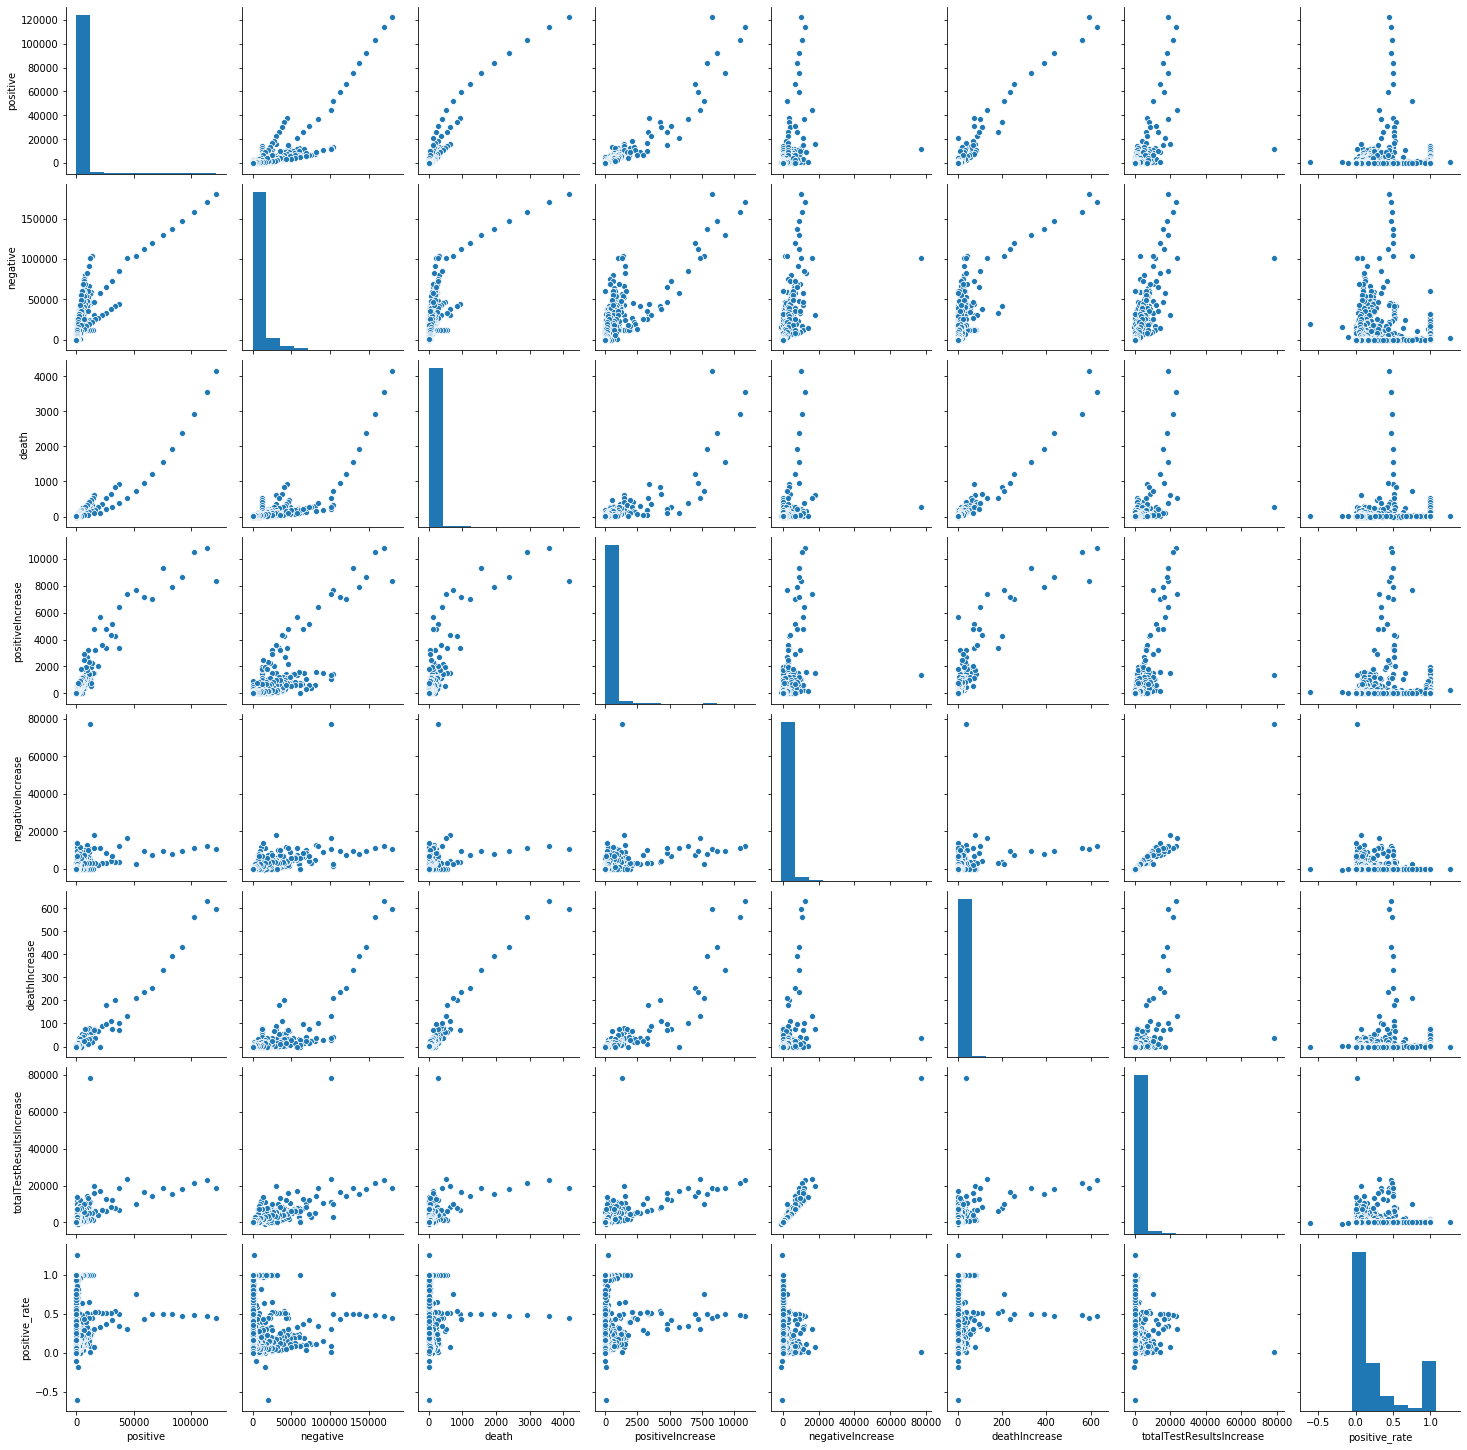

In [326]:
sns.pairplot(State_test_data_short.iloc[:,1:])

Outlier that positive rate equals = 1 happens when sometimes state only report positive quantity. For further study, we use a slice of dateset that drop those outlier records.

In [327]:
State_test_data_adjust = State_test_data_short.drop(index= State_test_data_short[State_test_data_short["positive_rate"] == 1].index)

In [329]:
State_test_data_adjust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1708
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1462 non-null   int64  
 1   state                     1462 non-null   object 
 2   positive                  1454 non-null   float64
 3   negative                  1366 non-null   float64
 4   death                     901 non-null    float64
 5   positiveIncrease          1406 non-null   float64
 6   negativeIncrease          1406 non-null   float64
 7   deathIncrease             1406 non-null   float64
 8   totalTestResultsIncrease  1406 non-null   float64
 9   positive_rate             1226 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 165.6+ KB


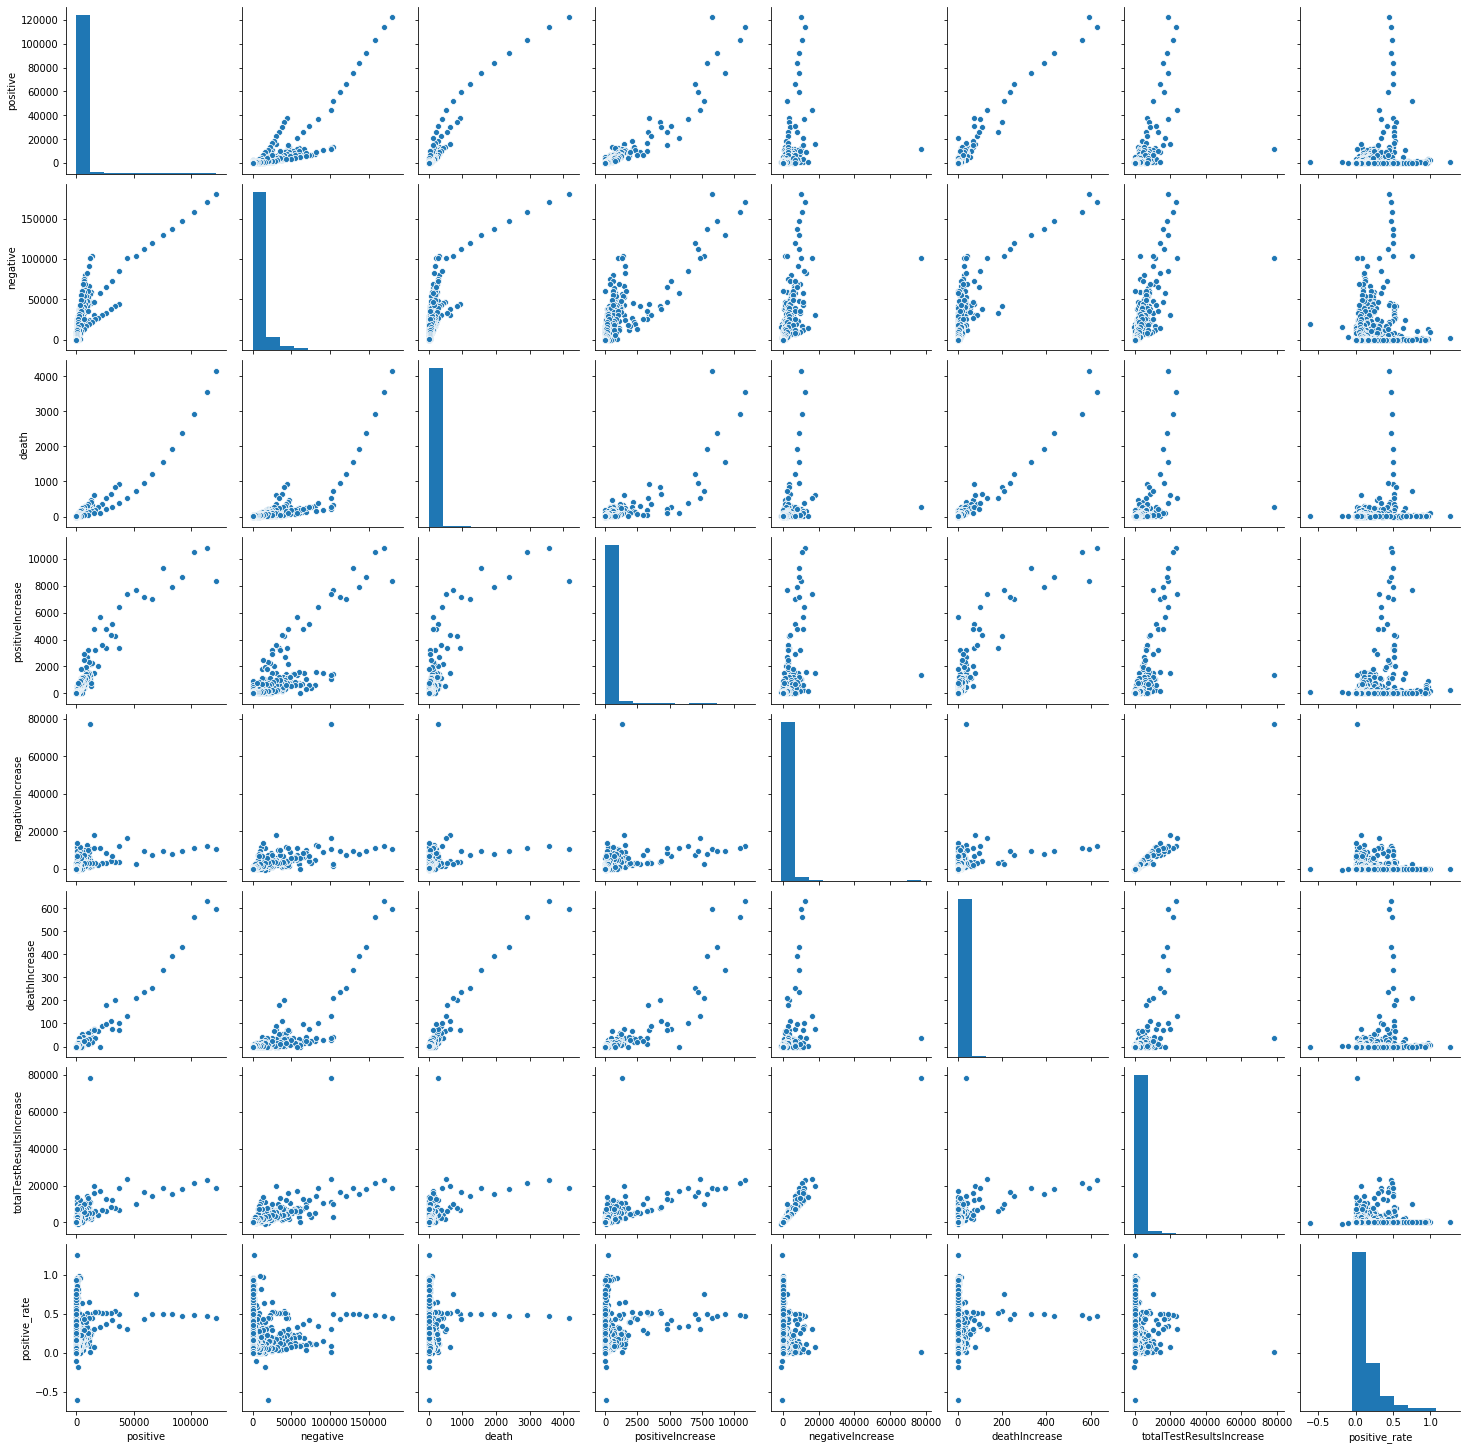

In [330]:
sns.pairplot(State_test_data_adjust.iloc[:,1:])

### worldwide situation

In [285]:
global_df = pd.read_csv("./Data/Case/time_series_covid19_confirmed_global.csv")

In [286]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         263 non-null    int64  
 5   1/23/20         263 non-null    int64  
 6   1/24/20         263 non-null    int64  
 7   1/25/20         263 non-null    int64  
 8   1/26/20         263 non-null    int64  
 9   1/27/20         263 non-null    int64  
 10  1/28/20         263 non-null    int64  
 11  1/29/20         263 non-null    int64  
 12  1/30/20         263 non-null    int64  
 13  1/31/20         263 non-null    int64  
 14  2/1/20          263 non-null    int64  
 15  2/2/20          263 non-null    int64  
 16  2/3/20          263 non-null    int64  
 17  2/4/20          263 non-null    int

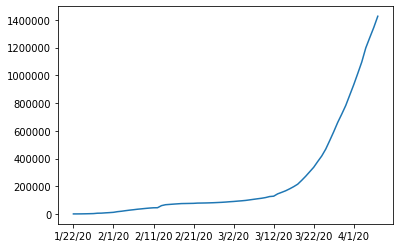

In [287]:
global_df.iloc[:,4:].sum().plot()

In [414]:
def get_data_after(n, df, agg_col):

    global_df2 = df.drop(["Lat", "Long"],axis=1).set_index(agg_col)
    g = global_df2.groupby(agg_col)
    global_df3 = g.sum()
    global_df3.drop("Diamond Princess",inplace=True)
#     global_df3.drop("Grand Princess",inplace=True)
    global_df3 = global_df3.transpose()

    day_after_n = {}

    for country in global_df3.columns:
        day_after_n[country] = global_df3[global_df3 > n][country].count()

    df_f_n = pd.DataFrame(columns=day_after_n.keys(),index=range(1, max(day_after_n.values())+1))

    for k, v in day_after_n.items():
        if v > 15:
            df_f_n.loc[:v, k] = list(global_df3.loc[global_df3.index[-v]:,k].values)
            
    return df_f_n.dropna(how='all', axis=1)

In [416]:
df_f_500_2 = get_data_after(500, global_df , "Country/Region")

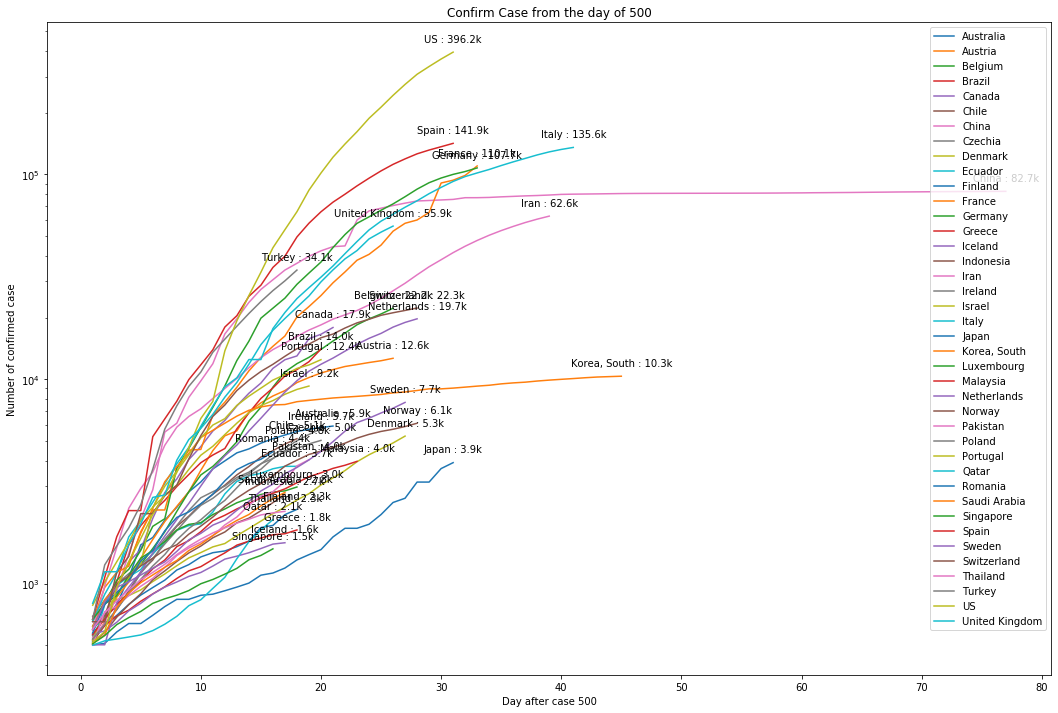

In [417]:
fig, ax = plt.subplots(figsize=(18,12))

df_f_500_2.plot(ax=ax, title = "Confirm Case from the day of 500", logy = True)
ax.set_ylabel('Number of confirmed case')
ax.set_xlabel('Day after case 500')

for country in df_f_500_2.columns:

    label = f"{country} : {round((df_f_500_2[country].max()/1000),1)}k"

    plt.annotate(label, # this is the text
                 (len(df_f_500_2[country]) - df_f_500_2[country].isna().sum(), df_f_500_2[country].max()), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### Inside US

In [394]:
state_df = pd.read_csv("./Data/Case/time_series_covid19_confirmed_US.csv")

g = state_df.groupby("Province_State")
state_df2 = g.sum().loc[:,"1/22/20":].transpose()
state_df

UID iso2 iso3  code3     FIPS      Admin2  \
0           16   AS  ASM     16     60.0         NaN   
1          316   GU  GUM    316     66.0         NaN   
2          580   MP  MNP    580     69.0         NaN   
3          630   PR  PRI    630     72.0         NaN   
4          850   VI  VIR    850     78.0         NaN   
...        ...  ...  ...    ...      ...         ...   
3248  84090053   US  USA    840  90053.0  Unassigned   
3249  84090054   US  USA    840  90054.0  Unassigned   
3250  84090055   US  USA    840  90055.0  Unassigned   
3251  84090056   US  USA    840  90056.0  Unassigned   
3252  84099999   US  USA    840  99999.0         NaN   

                Province_State Country_Region      Lat     Long_  ... 3/29/20  \
0               American Samoa             US -14.2710 -170.1320  ...       0   
1                         Guam             US  13.4443  144.7937  ...      56   
2     Northern Mariana Islands             US  15.0979  145.6739  ...       0   
3                  Puerto Rico             US  18.2208  -66.5901  ...     127   
4               Virgin Islands             US  18.3358  -64.8963  ...      23   
...                        ...            ...      ...       ...  ...     ...   
3248                Washington             US   0.0000    0.0000  ...     125   
3249             West Virginia             US   0.0000    0.0000  ...       0   
3250                 Wisconsin             US   0.0000    0.0000  ...       0   
3251                   Wyoming             US   0.0000    0.0000  ...       0   
3252            Grand Princess             US   0.0000    0.0000  ...     103   

      3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  
0           0        0       0       0       0       0       0       0       0  
1          58       69      77      82      84      93     112     113     121  
2           0        2       6       6       6       6       6       6       6  
3         174      239     286     316     316     452     475     513     573  
4          30       30      30      30      37      40      42      43      43  
...       ...      ...     ...     ...     ...     ...     ...     ...     ...  
3248      274      274     303     344     501     483     533     648     677  
3249        0        0       0       0       0       0       0       0       0  
3250        0        0       0       0       0       0       0       0       0  
3251        0        0       0       0       0       0       0       0       0  
3252      103      103     103     103     103     103     103     103     103  

[3253 rows x 88 columns]

In [418]:
state_df.rename({"Long_" : "Long"},axis=1, inplace=True)
df_f_100 = get_data_after(500, state_df , "Province_State")

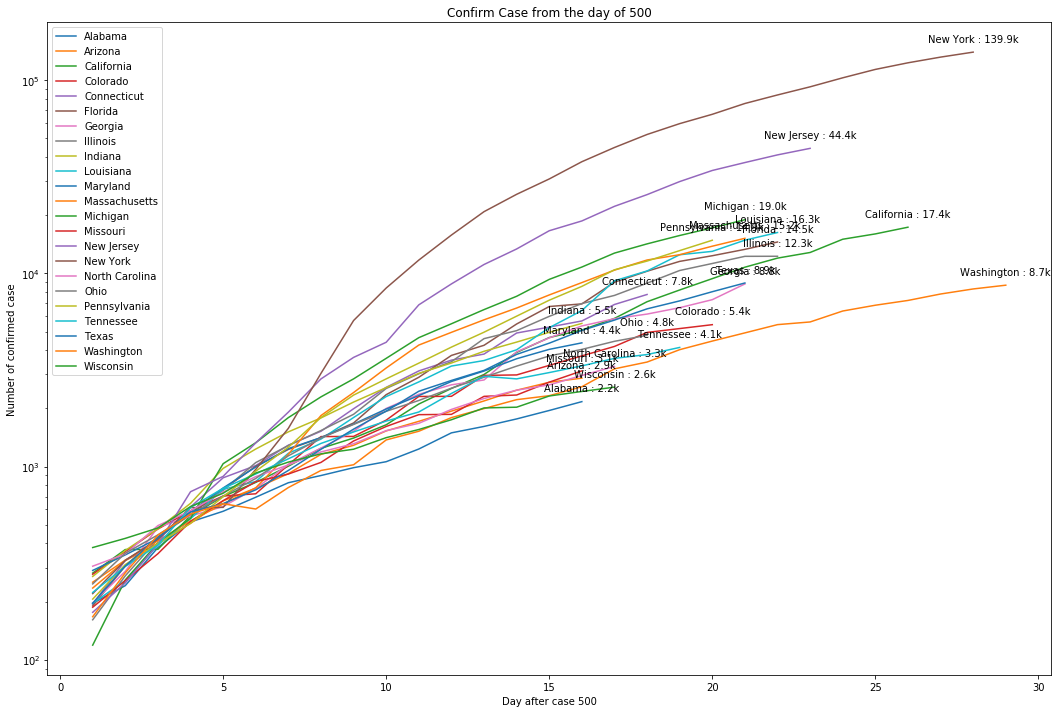

In [419]:
fig, ax = plt.subplots(figsize=(18,12))

df_f_100.plot(ax=ax, title = "Confirm Case from the day of 500", logy = True)
ax.set_ylabel('Number of confirmed case')
ax.set_xlabel('Day after case 500')

for country in df_f_100.columns:

    label = f"{country} : {round((df_f_100[country].max()/1000),1)}k"

    plt.annotate(label, # this is the text
                 (len(df_f_100[country]) - df_f_100[country].isna().sum(), df_f_100[country].max()), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

## MAPING

### US

In [52]:
df_latest = pd.read_csv("./Data/Case/04-07-2020.csv")
df_panel = pd.read_csv("./Data/Case/time_series_covid19_confirmed_US.csv")
lookup = pd.read_csv("./Data/Case/UID_ISO_FIPS_LookUp_Table.csv")

# df.drop("Unnamed: 0", axis=1, inplace=True)
# df.rename({"April 06, 2020_x" : "April 06, 2020"},axis=1, inplace=True)
# df.set_index("city2", inplace=True)

In [257]:
df_latest.dropna(subset=['Lat', 'Long_',"Admin2"], inplace=True)
df_latest = df_latest[df_latest["Country_Region"] == "US"]
df_latest2 = pd.merge(df_latest, lookup[["UID", "Combined_Key"]], how="left", left_on="Combined_Key", right_on="Combined_Key")
df_latest2.dropna(subset=['UID'], inplace=True)

In [264]:
df_panel[df_panel["UID"] == 84016001].iloc[0, 5]


'Ada'

In [271]:
data = df_panel[df_panel["UID"] == 84016001].iloc[0, -7:]

x = [datetime.datetime.strptime(i, '%m/%d/%y') for i in list(data.index)[-7:]]
x = pd.to_datetime(x).astype(int).astype(int) / 10 ** 6
y = list(df_panel[df_panel["UID"] == 84016001].iloc[0, -7:])
data2 = pd.DataFrame([x,y],index=["Date", "Confirmed"]).transpose()

alt.Chart(data2).mark_line().encode(
        alt.X('Date:T' , timeUnit='monthdate',axis = alt.Axis(title = 'DATE', format = ("%b %d"))), 
        alt.Y('Confirmed:Q',axis = alt.Axis(title = 'Number of Cases'))
    ).properties(

        title=f'{df_panel[df_panel["UID"] == 84016001].iloc[0, 5]} county has {int(y[-1])} case',
        width=300,
        height=200
    )

alt.Chart(...)

In [275]:
def line_vega(UID, panel):
    data = panel[panel["UID"] == UID].iloc[0, -7:]
#     f = lambda x: datetime.datetime.combine(x, datetime.time.min)
#     data.loc[:,"date"] = data["date"].apply(f)

    x = [datetime.datetime.strptime(i, '%m/%d/%y') for i in list(data.index)[-7:]]
    x = pd.to_datetime(x).astype(int).astype(int) / 10 ** 6
    y = list(data)
    data2 = pd.DataFrame([x,y],index=["Date", "Confirmed"]).transpose()


    line = alt.Chart(data2).mark_line().encode(
        alt.X('Date:T' , timeUnit='monthdate',axis = alt.Axis(title = 'DATE', format = ("%b %d"))), 
        alt.Y('Confirmed:Q',axis = alt.Axis(title = 'Number of Cases'))
    ).properties(
        title=f'{panel[panel["UID"] == UID].iloc[0, 5]} county has {int(y[-1])} case.',
        # , {int(y[-1]/ panel[panel["UID"] == UID].iloc[0, -8] * 100 - 100)}% increase in 7 days
        width=300,
        height=200
    )

    vega = folium.features.VegaLite(line, width=360, height=250)
    
    return vega

In [242]:
df_latest2.to_csv("df2.csv")

In [15]:
def color_on_quantity(n):
    
    if n > 10000:
        color="red" 
    elif n > 1000:
        color="#8B0000"   # pale red
    elif n > 100:
        color="#FA8072"# salmon  
    elif n > 10:
        color="#FFCE00"# tangerine        
    else:
        color="#0A8A9F" # teal
    return color

In [256]:
df_latest2.iloc[0:16, 7:]

Confirmed  Deaths  Recovered  Active                   Combined_Key  \
0           5       0          0       0  Abbeville, South Carolina, US   
1          82       2          0       0          Acadia, Louisiana, US   
2          11       0          0       0         Accomack, Virginia, US   
3         419       3          0       0                 Ada, Idaho, US   
4           1       0          0       0                Adair, Iowa, US   
5           3       0          0       0            Adair, Kentucky, US   
6          11       0          0       0            Adair, Missouri, US   
7          25       1          0       0            Adair, Oklahoma, US   
8         388      12          0       0            Adams, Colorado, US   
9           1       0          0       0               Adams, Idaho, US   
10          8       0          0       0            Adams, Illinois, US   
11          2       0          0       0             Adams, Indiana, US   
12         24       0          0       0         Adams, Mississippi, US   
13         15       0          0       0            Adams, Nebraska, US   
14          2       0          0       0                  Adams,Ohio,US   
15         28       0          0       0        Adams, Pennsylvania, US   

           UID  
0   84045001.0  
1   84022001.0  
2   84051001.0  
3   84016001.0  
4   84019001.0  
5   84021001.0  
6   84029001.0  
7   84040001.0  
8   84008001.0  
9   84016003.0  
10  84017001.0  
11  84018001.0  
12  84028001.0  
13  84031001.0  
14         NaN  
15  84042001.0

In [284]:
def plot_confirm_counts(data, panel):

    folium_map = folium.Map(location=[37, -105],
                            zoom_start=5,
                            tiles="CartoDB dark_matter", # alternative "OpenStreetMap"
                            width=960, 
                            height=540)
    
    for index in range(data.shape[0]):   # data.shape[0]
        case_info = data.iloc[index, 5:]
        if case_info[2] > 0:

            county_name = data.iloc[index, 1]
    
            # radius of circles
            radius = np.log10(case_info[2]*10) * 5

            # choose the color of the marker
            color = color_on_quantity(case_info[2])

            marker = folium.CircleMarker(location=(case_info[0],case_info[1]),
                                        radius=radius,
                                        color=color,
                                        fill=True)
            
            vega = line_vega(case_info[-1], df_panel)

            popup = folium.Popup()
            vega.add_to(popup)
            popup.add_to(marker)
            marker.add_to(folium_map)

    
    return folium_map

plot_confirm_counts(df_latest2, df_panel).save('US.html')

### LA

In [788]:
df = pd.read_csv("./Data/Case/la_community_0408.csv")
df.drop(346, axis=0, inplace=True)
# df.rename({"April 06, 2020_x" : "April 06, 2020"},axis=1, inplace=True)
# df.set_index("city2", inplace=True)

In [789]:
df.tail()

city April 08, 2020 April 07, 2020  \
342          Unincorporated - Whittier             --             --   
343  Unincorporated - Whittier Narrows              0              0   
344       Unincorporated - Willowbrook             19             15   
345          Unincorporated - Wiseburn             --             --   
347                   City of Pasadena             80             72   

    April 06, 2020 April 05, 2020 April 04, 2020 April 03, 2020  \
342             --             --              0              0   
343              0              0              0              0   
344             14             12             10              8   
345             --             --             --             --   
347             58             58             37             37   

    April 02, 2020 April 01, 2020 March 31, 2020  ... March 29, 2020  \
342              0              0              0  ...              0   
343              0              0              0  ...              0   
344              6              5              2  ...              1   
345             --             --             --  ...             --   
347             37             33             25  ...             10   

    March 28, 2020 March 27, 2020             city2 March 26, 2020  \
342              0              0          Whittier            3.0   
343              0            NaN  Whittier Narrows            NaN   
344              1              1       Willowbrook            1.0   
345             --             --          Wiseburn            NaN   
347              9              9          Pasadena            9.0   

     March 25, 2020  March 24, 2020  March 23, 2020  March 22, 2020  Density  
342             3.0             3.0             2.0             2.0       --  
343             NaN             NaN             NaN             NaN      NaN  
344             1.0             1.0             NaN             NaN    54.42  
345             NaN             NaN             NaN             NaN       --  
347             7.0             6.0             3.0             3.0    57.93  

[5 rows x 21 columns]

In [790]:
# to keep consistance name with Geojson, make minor changes to name of data

df.loc[df[df['city2'] == "Silverlake"].index,"city2"] = "Silver Lake"
df.loc[df[df['city2'] == "Mid-city"].index,"city2"] = "Mid-City"
df.loc[df[df['city2'] == "Baldwin Hills"].index,"city2"] = "Baldwin Hills/Crenshaw"
df.loc[df[df['city2'] == "Bel Air"].index,"city2"] = "Bel-Air"
df.loc[df[df['city2'] == "Country Club Park"].index,"city2"] = "Arlington Heights"
df.loc[df[df['city2'] == "Wilshire Center"].index,"city2"] = "Mid-Wilshire"


In order to make a good plot with marker, we calculate the central posistion of the each area.

In [791]:
import json
with open("la-county-neighborhoods-current.geojson") as f:
    data = json.load(f)

out_lst = []
for i in range(len(data["features"])):
    tem_lst = [data["features"][i]['properties']['name']]
    tem_lst.extend(np.array(data["features"][i]['geometry']['coordinates'][0][0]).mean(axis=0).tolist())
    out_lst.append(tem_lst)
geo_info_LA = pd.DataFrame(out_lst, columns=["city2", "Long", "Lat"])

In [792]:
geo_info_LA.set_index("city2", inplace = True)
# geo_info_LA.to_csv("gLA.csv")

In [794]:
df2 = pd.merge(df, geo_info_LA, how='left', left_on="city2", right_on="city2")
df2["display"] = df2["April 08, 2020"].apply(lambda x:4 if x == "--" else x)
df2["Density2"] = df2["Density"].apply(lambda x:0 if x == "--" else x)
df2.dropna(subset=['Long', 'display'], inplace=True)
df2["display"] = df2["display"].astype('int64')
df2["Density2"] = df2["Density2"].astype('float64')
df2.dtypes

city               object
April 08, 2020     object
April 07, 2020     object
April 06, 2020     object
April 05, 2020     object
April 04, 2020     object
April 03, 2020     object
April 02, 2020     object
April 01, 2020     object
March 31, 2020     object
March 30, 2020     object
March 29, 2020     object
March 28, 2020     object
March 27, 2020     object
city2              object
March 26, 2020    float64
March 25, 2020    float64
March 24, 2020    float64
March 23, 2020    float64
March 22, 2020    float64
Density            object
Long              float64
Lat               float64
display             int64
Density2          float64
dtype: object

In [433]:
# df2.to_csv("LA_data_with_LL.csv")

In [795]:
m2 = folium.Map(location=[34.052, -118.243], zoom_start=10)

folium.Choropleth(
    geo_data="la-county-neighborhoods-current.geojson",
    name='choropleth',
    data=df2,
    columns=['city2', 'display'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='April 08 Confirm Case'
).add_to(m2)


In [796]:
# add a marker for every record in the filtered data, use a clustered view
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(m2) # create marker clusters

for i in df2.index:

    location = [df2['Lat'][i],df2['Long'][i]]

    if df2['April 08, 2020'][i] == "--":
        pop_up_text = f"{df2['city2'][i]} has less than 5 cases."
    elif df2['April 01, 2020'][i] == "--" or df2['April 01, 2020'][i] == "0":
        pop_up_text = f"{df2['city2'][i]} has {df2['April 08, 2020'][i]} cases."
    else:
        pop_up_text = f"{df2['city2'][i]} has {df2['April 08, 2020'][i]} cases, \
        up {int((int(df2['April 08, 2020'][i])/int(df2['April 01, 2020'][i])-1)*100) }% in 7 days."

    marker_popup = folium.Popup(pop_up_text, max_width=300,min_width=200)
        
    folium.Marker(location
                     ,popup=marker_popup
                     ).add_to(marker_cluster)

m2.save('LA1.html')

m2

In [797]:
m3 = folium.Map(location=[34.052, -118.243], zoom_start=10)

folium.Choropleth(
    geo_data="la-county-neighborhoods-current.geojson",
    name='choropleth',
    data=df2,
    columns=['city2', 'Density2'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Confirm Case per 100k Population'
).add_to(m3)


In [798]:
# add a marker for every record in the filtered data, use a clustered view
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(m3) # create marker clusters

for i in df2.index:

    location = [df2['Lat'][i],df2['Long'][i]]

    if df2['April 08, 2020'][i] == "--":
        pop_up_text = f"{df2['city2'][i]} has less than 5 cases."
    elif df2['April 01, 2020'][i] == "--" or df2['April 01, 2020'][i] == "0":
        pop_up_text = f"{df2['city2'][i]} has {df2['April 08, 2020'][i]} cases."
    else:
        pop_up_text = f"{df2['city2'][i]} has {df2['April 08, 2020'][i]} cases, \
        up {int((int(df2['April 08, 2020'][i])/int(df2['April 01, 2020'][i])-1)*100) }% in 7 days."

    marker_popup = folium.Popup(pop_up_text, max_width=300,min_width=200)
        
    folium.Marker(location
                     ,popup=marker_popup
                     ).add_to(marker_cluster)

m3.save('LA2.html')

m3

# Wednesday: Hypotheses testing and get things organized

    -[x] Finish up plotting & mapping
    -[x] Hypotheses testing
    -[ ] Clean up the notebook

## Hypotheses testing

One of the reason that I curious of this COVID-19 topic is that our Mayor Eric Garcetti claims that LA city/county is few date behind NYC which scares lots of people in LA.
Hence, we will exam his hypotheses through a **Hypotheses test**.

LA mayor said city is likely 5 days away from coronavirus reaching NYC-level"
[image]- Mar 27th


H0: In Apr 1st LA county has same case development patten as NYC in Mar 27th.

H1: In Apr 1st LA county has different case development patten as NYC in Mar 27th.

in order to do so, we extracted NYC data as list_NYC and LAC data as list_LAC.

In [316]:
df = pd.read_csv("./Data/Case/time_series_covid19_confirmed_US.csv")
list_LAC = df[df["Admin2"] == "Los Angeles"].loc[:,"3/28/20":"4/1/20"].values.tolist()[0]
list_NYC = df[df["Admin2"] == "New York"].loc[:,"3/23/20":"3/27/20"].values.tolist()[0]

In [814]:
res = stats.mannwhitneyu(list_LAC, list_NYC, alternative="less")
print("P-value of the U-test is {:2.3f}. \nWe reject the null hypotheses on a signficant level 0.05."
      .format(res.pvalue))

P-value of the U-test is 0.006. 
We reject the null hypotheses on a signficant level 0.05.


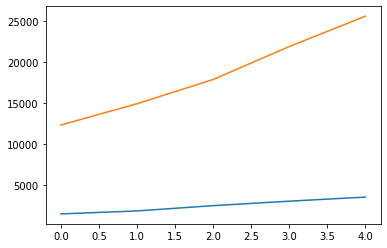

In [815]:
plt.plot(list_LAC)
plt.plot(list_NYC)

In [341]:
list_LAC2 = df[df["Admin2"] == "Los Angeles"].loc[:,"3/10/20":].values.tolist()[0]
list_NYC2 = df[df["Admin2"] == "New York"].loc[:,"3/10/20":].values.tolist()[0]
date = df[df["Admin2"] == "New York"].loc[:,"3/10/20":].columns.tolist()

In [360]:
list_LAC_r = []
list_NYC_r = []
for i in range(1,len(list_LAC2)):
    list_LAC_r.append(list_LAC2[i]-list_LAC2[i-1])
    list_NYC_r.append(list_NYC2[i]-list_NYC2[i-1])
date2 = date[1:]

In [371]:
list_LAC_r2 = []
list_NYC_r2 = []
for i in range(1,len(list_LAC_r)):
    if list_LAC_r[i-1]>0:
        list_LAC_r2.append(list_LAC_r[i]/list_LAC_r[i-1] - 1)
    else:
        list_LAC_r2.append(0)

    if list_NYC_r[i-1]>0:
        list_NYC_r2.append(list_NYC_r[i]/list_NYC_r[i-1] - 1)
    else:
        list_NYC_r2.append(0)    

date3 = date2[1:]

In [378]:
list_LAC_r

[7,
 5,
 8,
 13,
 0,
 41,
 50,
 46,
 41,
 61,
 0,
 115,
 129,
 126,
 150,
 417,
 236,
 0,
 364,
 645,
 545,
 499,
 527,
 521,
 39,
 1350,
 422,
 559]

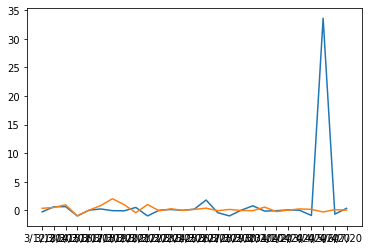

In [376]:
plt.plot(date3,list_LAC_r2)
plt.plot(date3,list_NYC_r2)

## Clean up

In [337]:
list_NYC2

[12305, 14904, 17856, 21873, 25573]

In [338]:
list_LAC

[1465, 1829, 2474, 3019, 3518]